#Desarrollo de Algoritmos de Aprendizaje Automático
#AA03 - Trabajo Práctico III
#**Proyecto de Machine Learning**
### Empleando el dataset "ecommerce_customers.csv" efectuar un proyecto de Machine Learning que permita predecir el monto que gastará en el futuro un cliente.

Link del codigo: https://colab.research.google.com/drive/1rusKCas5KU67azNJqcDtrkJp-VsRPdkk?usp=sharing

## 1. Importación de librerías

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carga de datos

In [70]:
data = pd.read_csv('ecommerce_customers.csv')

In [71]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## 3. Análisis Exploratorio

###3.1. Información de datos

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### 3.2. Valor faltante

In [73]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### 3.3. Estadísticas descriptivas

In [74]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### 3.4. Resumen de datos

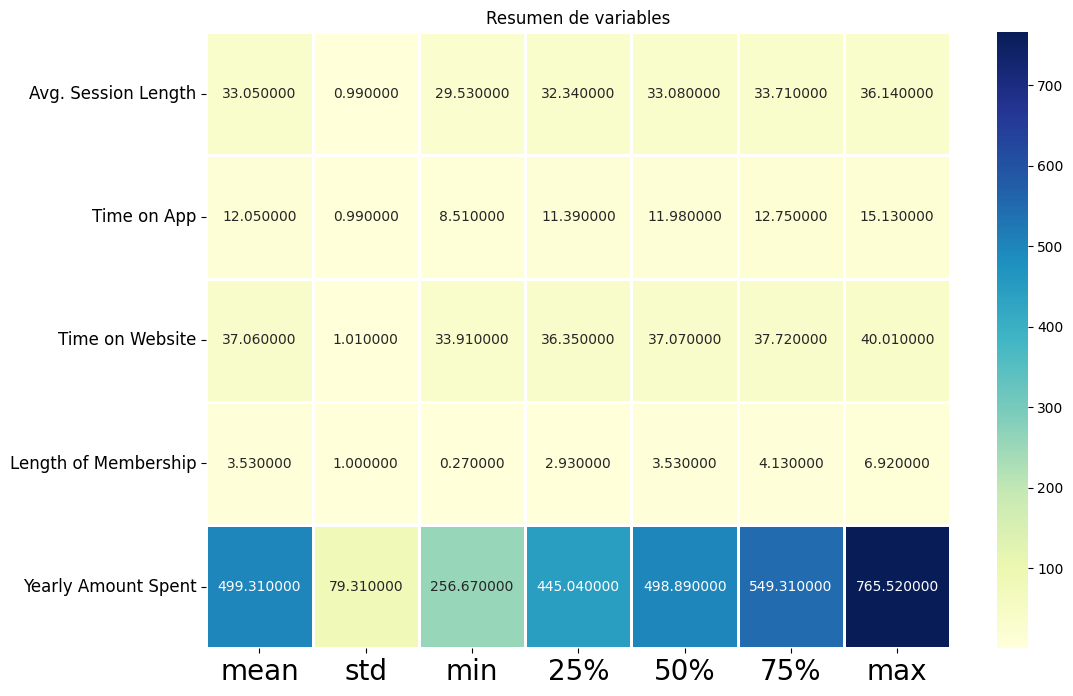

In [75]:
# Resumen de datos
plt.figure(figsize=(12,8))
sns.heatmap(round(data.describe()[1:].transpose(), 2), linewidth=2, annot=True, fmt="f", cmap="YlGnBu")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Resumen de variables")
plt.show()

## 4. Procesamiento de datos

### 4.1. Elimino columnas

In [76]:
data = data.drop(['Email', 'Address', 'Avatar'], axis=1)

### 4.2. Visualización de datos

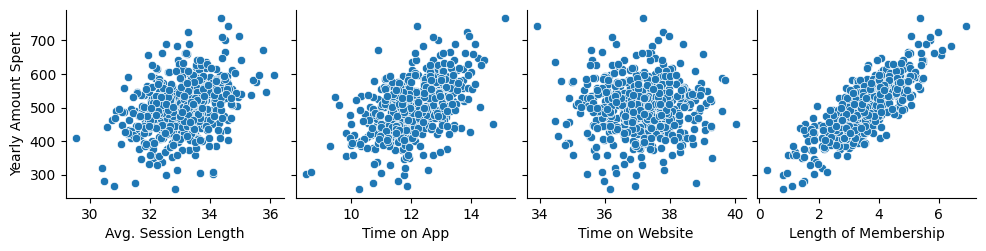

In [77]:
# Diagrama de dispersión de las características
sns.pairplot(data, x_vars=['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'], y_vars='Yearly Amount Spent', kind='scatter')
plt.show()


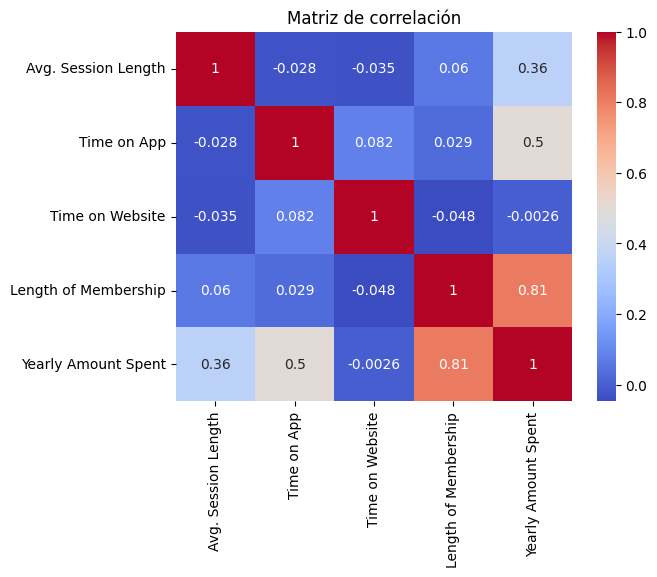

In [78]:
# Matriz de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### 4.3. Selección de datos de entrenamiento

In [79]:
X = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

### 4.4. Escalado de caracteristicas

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4.5. División de datos

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

## 7. Modelado y evaluación

### 7.1 Decision Tree Regressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
# Creor una instancia del modelo de Árbol de Decisión
decision_tree = DecisionTreeRegressor()

# Entreno el modelo con los datos de entrenamiento
decision_tree.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred_decision_tree = decision_tree.predict(X_test)




In [84]:
# Evaluar el rendimiento del modelo
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Árbol de Decisión:")
print("Error cuadrático medio (MSE):", mse_decision_tree)
print("Coeficiente de determinación (R²):", r2_decision_tree)

Árbol de Decisión:
Error cuadrático medio (MSE): 552.3695289871405
Coeficiente de determinación (R²): 0.8989289591300046


### 7.2. XGBoost Regressor

In [85]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
# Crear una instancia del modelo XGBoost Regressor
xgb_regressor = xgb.XGBRegressor()
# Entrenar el modelo con los datos de entrenamiento
xgb_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = xgb_regressor.predict(X_test)


In [87]:
# Evaluar el rendimiento del modelo
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor:")
print("Error cuadrático medio (MSE):", mse_xgb)
print("Coeficiente de determinación (R²):", r2_xgb)

XGBoost Regressor:
Error cuadrático medio (MSE): 250.55463582852963
Coeficiente de determinación (R²): 0.9541542092583791


### 7.3. K-Nearest Neighbors

In [88]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de Regresión de Vecinos Cercanos
knn = KNeighborsRegressor()

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Evaluar el rendimiento del modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Regresión de Vecinos Cercanos (KNN):")
print("Error cuadrático medio (MSE):", mse_knn)
print("Coeficiente de determinación (R²):", r2_knn)


Regresión de Vecinos Cercanos (KNN):
Error cuadrático medio (MSE): 446.4696989445867
Coeficiente de determinación (R²): 0.9183062156379496


## 8. Resultados de los modelos



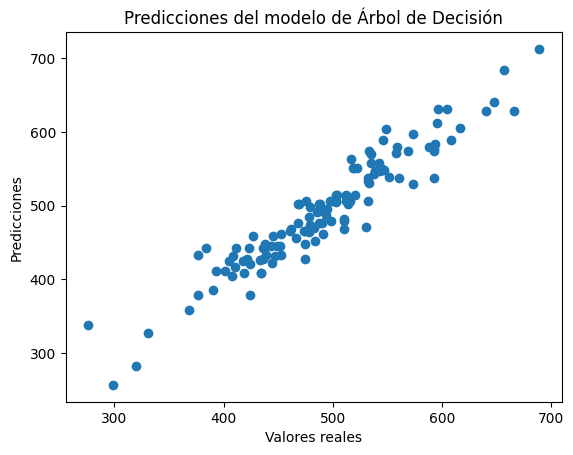

In [91]:
# Diagrama de dispersión de las predicciones del modelo de Árbol de Decisión
plt.scatter(y_test, y_pred_decision_tree)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones del modelo de Árbol de Decisión')
plt.show()


Esta grafica indica que el modelo puede tener dificultades para capturar ciertas variaciones en los datos y, por lo tanto, su rendimiento puede ser limitado.

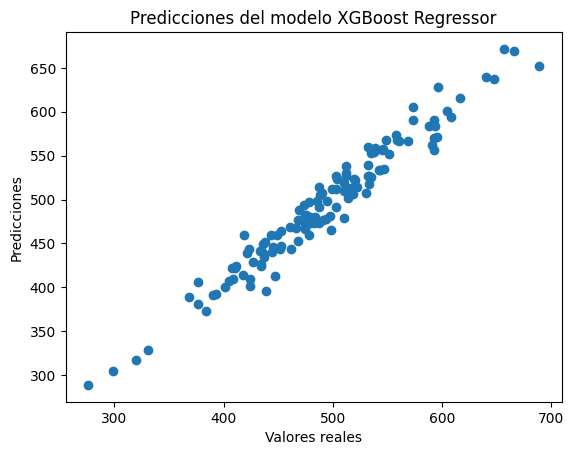

In [92]:
# Diagrama de dispersión de las predicciones del modelo XGBoost Regressor
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones del modelo XGBoost Regressor')
plt.show()

 La mayoría de los puntos se encuentran cerca de una línea diagonal, lo que indica una buena capacidad del modelo para capturar las relaciones entre las variables predictoras y la variable objetivo. Esto sugiere que el modelo XGBoost Regressor puede realizar predicciones más precisas en comparación con el modelo de Árbol de Decisión.

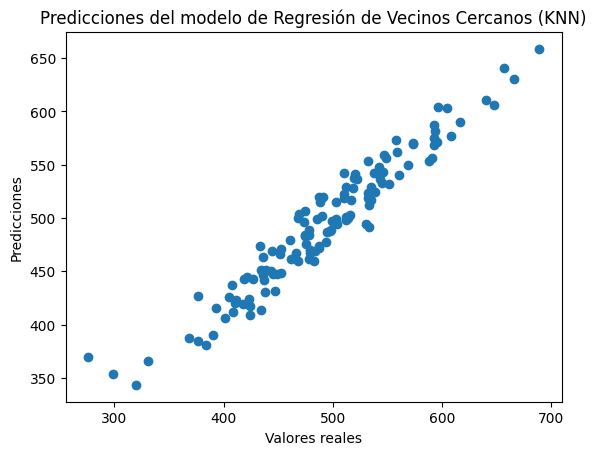

In [93]:
# Diagrama de dispersión de las predicciones del modelo de Regresión de Vecinos Cercanos (KNN)
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones del modelo de Regresión de Vecinos Cercanos (KNN)')
plt.show()

Se observa una mayor dispersión alrededor de la línea diagonal, lo que indica una menor precisión en comparación con el modelo XGBoost Regressor. Esto puede sugerir que el modelo KNN puede no estar capturando todas las relaciones no lineales presentes en los datos.

## 9. Conclusión

Se concluye que el modelo XGBoost Regressor tuvo el mejor rendimiento, con un MSE de 250.55 y un R² de 0.954. Esto indica que el modelo puede predecir con precisión el monto que un cliente gastará en el futuro con base en las características proporcionadas en el dataset.